# **Setting up the environment**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

# **Data loading**

In [3]:
import os
ham_path = "/kaggle/input/spam-ham/enron2/ham/"

In [4]:
ham = []

In [5]:
for filename in os.listdir(ham_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(ham_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            try:
                content = file.read()
                ham.append(content)
            except UnicodeDecodeError:
                print(f"UnicodeDecodeError in {file_path}. Skipping this file.")

UnicodeDecodeError in /kaggle/input/spam-ham/enron2/ham/5392.2001-04-23.kaminski.ham.txt. Skipping this file.


In [6]:
df_ham = pd.DataFrame(ham, columns=["email"])

In [7]:
df_ham

,email
0,"Subject: var for cob 2 nd aug 2000\nhi vince ,..."
1,"Subject: my resume\nmolly ,\nwe would like to ..."
2,Subject: enron trial of energycast service\nmi...
3,Subject: iafe membership\ndear colleague :\nwe...
4,"Subject: intranet site\ndear dale / all ,\ntha..."
...,...
4355,Subject: alp presentation\non behalf of enron ...
4356,Subject: re : uk : reconciling the spreadsheet...
4357,Subject: refined products line - - north ameri...
4358,Subject: re : ken lay ' s speech\nthe $ 460 bi...


In [8]:
spam_path = '/kaggle/input/spam-ham/enron2/spam/'
spam = []

In [9]:
for filename in os.listdir(spam_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(spam_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            try:
                content = file.read()
                spam.append(content)
            except UnicodeDecodeError:
                print(f"UnicodeDecodeError in {file_path}. Skipping this file.")

UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/3075.2005-06-29.SA_and_HP.spam.txt. Skipping this file.
UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/1239.2002-08-26.SA_and_HP.spam.txt. Skipping this file.
UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/1321.2002-08-31.SA_and_HP.spam.txt. Skipping this file.
UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/2467.2005-06-25.SA_and_HP.spam.txt. Skipping this file.
UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/5507.2005-07-20.SA_and_HP.spam.txt. Skipping this file.
UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/3363.2005-07-01.SA_and_HP.spam.txt. Skipping this file.
UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/5737.2005-07-21.SA_and_HP.spam.txt. Skipping this file.
UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/4961.2005-07-18.SA_and_HP.spam.txt. Skipping this file.
UnicodeDecodeError in /kaggle/input/spam-ham/enron2/spam/3100.2005-06-29.SA_and_HP.spam.txt. Ski

In [10]:
df_spam = pd.DataFrame(spam, columns=["email"])

In [11]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   1368 non-null   object
dtypes: object(1)
memory usage: 10.8+ KB


# **Data preprocessing**

In [12]:
df_ham['type'] = 'ham'
df_spam['type'] = 'spam'

In [13]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   1368 non-null   object
 1   type    1368 non-null   object
dtypes: object(2)
memory usage: 21.5+ KB


In [14]:
df_spam.head()

,email,type
0,Subject: returned mail : see transcript for de...,spam
1,Subject: in the heart of your business !\ncorp...,spam
2,Subject: hey ! tell your friends to hit me up\...,spam
3,Subject: hassle - free microsoft sql server re...,spam
4,Subject: get your babies diapers bill paid for...,spam


In [15]:
df = pd.concat([df_ham, df_spam], axis=0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5728 entries, 0 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5728 non-null   object
 1   type    5728 non-null   object
dtypes: object(2)
memory usage: 134.2+ KB


In [17]:
df.head()

,email,type
0,"Subject: var for cob 2 nd aug 2000\nhi vince ,...",ham
1,"Subject: my resume\nmolly ,\nwe would like to ...",ham
2,Subject: enron trial of energycast service\nmi...,ham
3,Subject: iafe membership\ndear colleague :\nwe...,ham
4,"Subject: intranet site\ndear dale / all ,\ntha...",ham


In [18]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df)

In [19]:
df_shuffled.head()

,email,type
1226,Subject: the next move higher for strong marke...,spam
1437,"Subject: dear ms . feldman ,\nplease find encl...",ham
10,Subject: re : telephone interview with enron c...,ham
4100,Subject: fyi : energy operations promotions\nh...,ham
831,Subject: re : f / u to dr . kaminski @ enron f...,ham


In [20]:
X = df_shuffled.drop(['type'],axis=1)
y = df_shuffled['type']

In [21]:
y

1226    spam
1437     ham
10       ham
4100     ham
831      ham
        ... 
2397     ham
2994     ham
2721     ham
1005    spam
178     spam
Name: type, Length: 5728, dtype: object

In [22]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
y = encoder.fit_transform([y])

In [23]:
emails=X.copy()

In [24]:
emails.reset_index(inplace=True)

# **Text preprocessing**

In [25]:
import nltk
import re
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(emails)):
    email = re.sub('[^a-zA-Z]', ' ', emails['email'][i])
    email = email.lower()
    email = email.split()
    
    email = [ps.stem(word) for word in email if not word in stopwords.words('english')]
    email = ' '.join(email)
    corpus.append(email)

In [28]:
voc_size=5000
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [30]:
embedding_vector_features=40

# **Model**

In [31]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voc_size,embedding_vector_features,input_length=sent_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              173056    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 373,313
Trainable params: 373,313
Non-trainable params: 0
_________________________________________________________________


In [33]:
X_final=np.array(embedded_docs)

In [34]:
X_final

array([[ 527, 3049, 3184, ..., 3598, 3466, 2068],
       [4034, 1542, 4714, ..., 2410, 3159, 2846],
       [3813, 4213, 3012, ..., 2979, 2922,  433],
       ...,
       [2828, 3932,  530, ...,  852, 1451, 2050],
       [4089, 4637, 2604, ..., 1651, 2944, 4347],
       [4387, 1954, 3569, ..., 3819, 2881, 1439]], dtype=int32)

In [35]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_final, y.reshape(-1), test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# **Model training**

In [36]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=5)

Epoch 1/5
108/108 [==============================] - 8s 39ms/step - loss: 0.0557 - accuracy: 0.9933 - val_loss: 1.0970e-07 - val_accuracy: 1.0000
Epoch 2/5
108/108 [==============================] - 4s 34ms/step - loss: 1.5477e-07 - accuracy: 1.0000 - val_loss: 1.0796e-07 - val_accuracy: 1.0000
Epoch 3/5
108/108 [==============================] - 4s 34ms/step - loss: 1.4952e-07 - accuracy: 1.0000 - val_loss: 1.0584e-07 - val_accuracy: 1.0000
Epoch 4/5
108/108 [==============================] - 4s 33ms/step - loss: 1.4181e-07 - accuracy: 1.0000 - val_loss: 1.0346e-07 - val_accuracy: 1.0000
Epoch 5/5
108/108 [==============================] - 4s 33ms/step - loss: 1.4477e-07 - accuracy: 1.0000 - val_loss: 1.0075e-07 - val_accuracy: 1.0000


In [37]:
score = model.evaluate(X_test , y_test)

36/36 [==============================] - 0s 11ms/step - loss: 1.0078e-07 - accuracy: 1.0000


# **Error analysis**

In [38]:
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

Test Accuracy : 100.0000 %


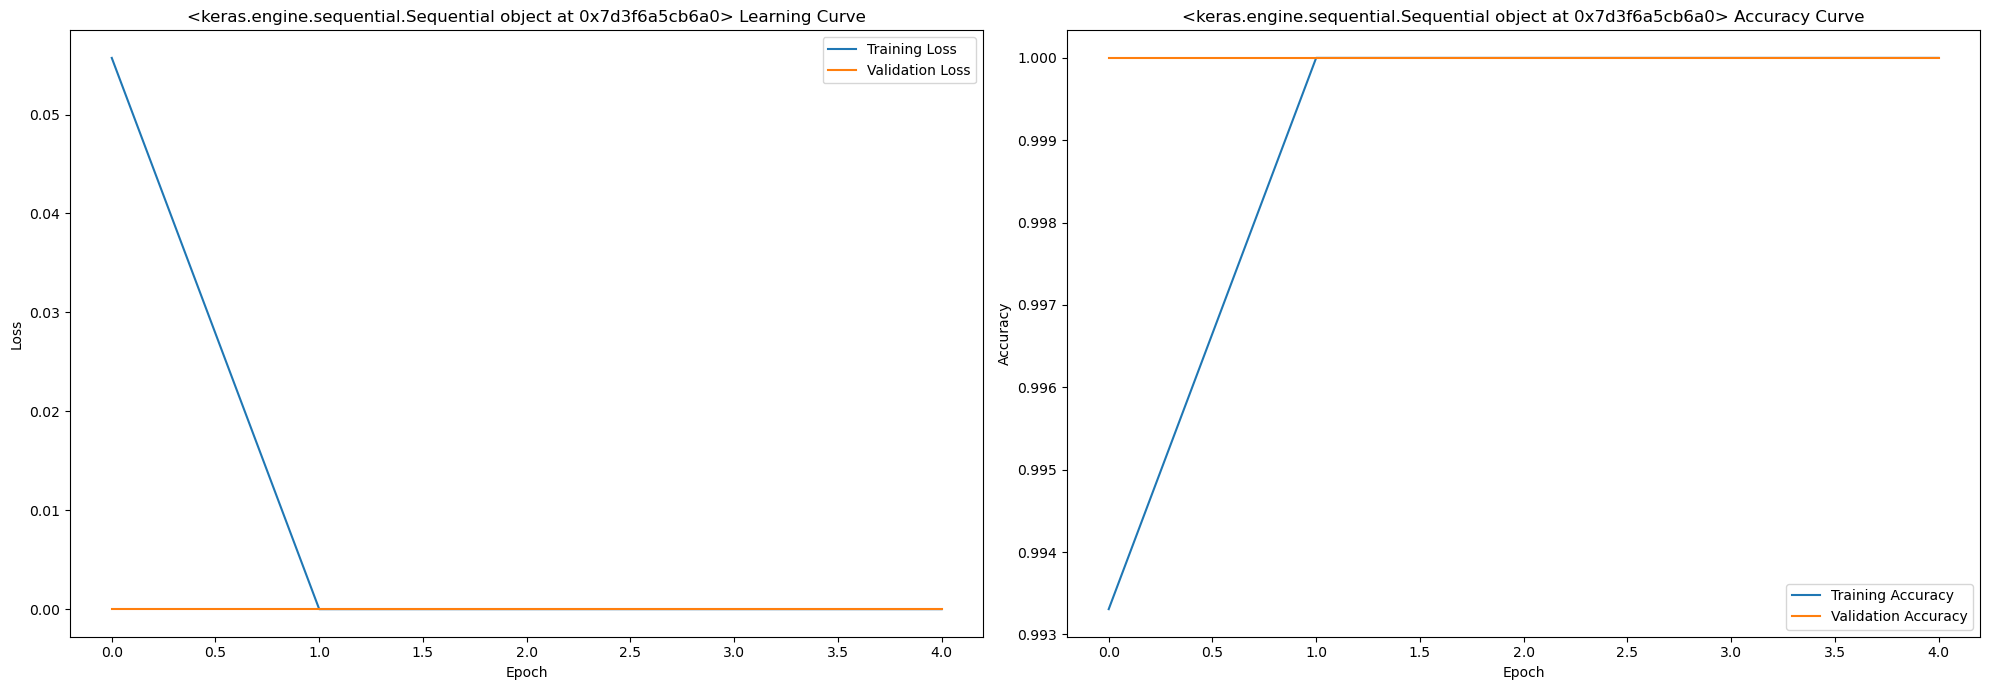

In [39]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history, model, axs[0])
plot_accuracy_curves(history, model, axs[1])

plt.tight_layout()
plt.show()
